<a href="https://colab.research.google.com/github/vit050587/course_lab_megafon/blob/master/final_project_megafon.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Финальный проект по курсу от компании "Мегафон"**
**Задача: сформировать персональные предложения абонентам компании "Мегафон"**

Задача состоит из 2-х подзадач:
1. Предсказание вероятности подключения услуги
2. Формирование индивидуальных предложений и максимизация выручки

Представлен датасет:
- откликов абонентов на те или иные продукты
- профиль потребеления абонентов

У нас появился запрос из отдела продаж и маркетинга. Как вы знаете «МегаФон» предлагает обширный набор различных услуг своим абонентам. При этом разным пользователям интересны разные услуги. Поэтому необходимо построить алгоритм, который для каждой пары пользователь-услуга определит вероятность подключения услуги.


**Данные** В качестве исходных данных вам будет доступна информация об отклике абонентов на предложение подключения одной из услуг. Каждому пользователю может быть сделано несколько предложений в разное время, каждое из которых он может или принять, или отклонить.


Отдельным набором данных будет являться нормализованный анонимизированный набор признаков, характеризующий профиль потребления абонента. Эти данные привязаны к определенному времени, поскольку профиль абонента может меняться с течением времени.

**Данные train и test разбиты по периодам – на train доступно 4 месяцев, а на test отложен последующий месяц.**

Итого, в качестве входных данных будут представлены:

* data_train.csv: id, vas_id, buy_time, target
* features.csv.zip: id, <feature_list>

**И тестовый набор:**

**data_test.csv: id, vas_id, buy_time**
* **target** - целевая переменная, где 1 означает подключение услуги, 0 - абонент не подключил услугу соответственно.
* **buy_time** - время покупки, представлено в формате timestamp, для работы с этим столбцом понадобится функция datetime. 
fromtimestamp из модуля datetime.
* **id** - идентификатор абонента
* **vas_id** - подключаемая услуга
Примечание: Размер файла features.csv в распакованном виде весит 20 гб, для работы с ним можно воспользоваться pandas.read_csv, либо можно воспользоваться библиотекой Dask.

**Метрика**

Скоринг будет осуществляться функцией f1, невзвешенным образом, как например делает функция sklearn.metrics.f1_score(…, average='macro').

**Формат представления результата**

1. Работающая модель в формате pickle, которая принимает файл data_test.csv из корневой папки и записывает в эту же папку файл answers_test.csv. В этом файле должны находится 4 столбца: buy_time, id, vas_id и target. Target можно записать как вероятность подключения услуги.
2. Код модели можно представить в виде jupyter-ноутбука.
3. Презентация в формате .pdf, в которой необходимо отразить:
* Информация о модели, ее параметрах, особенностях и основных результатах.
* Обоснование выбора модели и ее сравнение с альтернативами.
* Принцип составления индивидуальных предложений для выбранных абонентов.
Рекомендуемое количество слайдов – 5 – 10.

Файл answers_test.csv с результатами работы модели, презентацию, ноутбуки и резюме необходимо прикрепить ко второму уроку "курсовой проект".

In [4]:
!pip install pathlib2

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [5]:
!pip install lightautoml

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 319.6/319.6 KB 6.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 465.2/465.2 KB 27.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 11.7/11.7 MB 67.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.0/2.0 MB 71.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 76.6/76.6 MB 11.6 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 804.1/804.1 MB 984.0 kB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 365.3/365.3 KB 31.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 215.7/215.7 KB 18.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.8/2.8 MB 82.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 212.2/212.2 KB 21.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.0/6.0 

In [6]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns
from pathlib2 import Path
import sys
from datetime import date
import datetime
import itertools
import logging
import pickle

from sklearn.linear_model import LinearRegression, Lasso, Ridge, LassoCV, RidgeCV, LogisticRegression
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, f1_score, precision_recall_curve, roc_curve, auc, confusion_matrix
from sklearn.model_selection import train_test_split, KFold, cross_validate
from sklearn.pipeline import Pipeline

from lightautoml.automl.presets.tabular_presets import TabularAutoML, TabularUtilizedAutoML
from lightautoml.tasks import Task

import xgboost as xgb

In [7]:
path = Path('/content/drive/MyDrive/Colab Notebooks/megafon/course_lab/')

# Загрузка данных

In [8]:
train = pd.read_csv(path.joinpath('data_train.csv')).drop(['Unnamed: 0'], axis=1)
train

,id,vas_id,buy_time,target
0,540968,8.0,1537131600,0.0
1,1454121,4.0,1531688400,0.0
2,2458816,1.0,1534107600,0.0
3,3535012,5.0,1535922000,0.0
4,1693214,1.0,1535922000,0.0
...,...,...,...,...
831648,3812226,2.0,1546203600,0.0
831649,2480469,2.0,1546203600,0.0
831650,158236,2.0,1546203600,0.0
831651,1825525,2.0,1546203600,0.0


In [9]:
test = pd.read_csv(path.joinpath('data_test.csv')).drop(['Unnamed: 0'], axis=1)
test

,id,vas_id,buy_time
0,3130519,2.0,1548018000
1,2000860,4.0,1548018000
2,1099444,2.0,1546808400
3,1343255,5.0,1547413200
4,1277040,2.0,1546808400
...,...,...,...
71226,2502453,5.0,1548018000
71227,1693213,2.0,1548018000
71228,1891350,2.0,1548018000
71229,2437172,2.0,1548018000


In [10]:
features = pd.read_csv(path.joinpath('features.csv'), sep='\t').drop(['Unnamed: 0'], axis=1)
features

,id,buy_time,0,1,2,3,4,5,6,7,...,243,244,245,246,247,248,249,250,251,252
0,2013026,1531688400,18.910029,46.980888,4.969214,-1.386798,3.791754,-14.01179,-16.08618,-65.076097,...,-977.373846,-613.770792,-25.996269,-37.630448,-301.747724,-25.832889,-0.694428,-12.175933,-0.45614,0.0
1,2014722,1539550800,36.690029,152.400888,448.069214,563.833202,463.841754,568.99821,-16.08618,-53.216097,...,-891.373846,-544.770792,-20.996269,48.369552,80.252276,-13.832889,-0.694428,-1.175933,-0.45614,0.0
2,2015199,1545598800,-67.019971,157.050888,-63.180786,178.103202,-68.598246,156.99821,3.51382,25.183903,...,-977.373846,-613.770792,-12.996269,-37.630448,10829.252276,-25.832889,-0.694428,-12.175933,-0.45614,0.0
3,2021765,1534107600,7.010029,150.200888,-6.930786,216.213202,76.621754,351.84821,-16.08618,-65.076097,...,-973.373846,-613.770792,-23.996269,-37.630448,-205.747724,-24.832889,-0.694428,-11.175933,-0.45614,1.0
4,2027465,1533502800,-90.439971,134.220888,-104.380786,153.643202,-109.798246,132.53821,-16.08618,-65.076097,...,1643.626154,2007.229208,206.003731,-21.630448,6667.252276,92.167111,-0.694428,49.824067,47.54386,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
225621,3394894,1544389200,139.210029,-61.149112,125.269214,-101.056798,119.851754,-122.16179,5.10382,-43.886097,...,-769.373846,-571.770792,-24.996269,-37.630448,119.252276,-20.832889,-0.694428,-12.175933,2.54386,0.0
225622,3395168,1547413200,152.370029,-27.879112,138.429214,-80.486798,133.011754,-101.59179,-16.08618,-65.076097,...,-951.373846,-613.770792,-25.996269,5.369552,-66.747724,143.167111,-0.694428,-12.175933,-0.45614,0.0
225623,3395283,1545598800,27.610029,-160.889112,13.669214,-213.496798,8.251754,-234.60179,-16.08618,-65.076097,...,-973.373846,-609.770792,-25.996269,-37.630448,-295.747724,-25.832889,-0.694428,-12.175933,-0.45614,0.0
225624,3395373,1544994000,21.840029,-11.059112,37.559214,122.773202,32.141754,101.66821,-16.08618,-65.076097,...,-895.373846,-607.770792,-24.996269,-37.630448,-250.747724,-15.832889,-0.694428,-12.175933,-0.45614,0.0


In [11]:
# размер features в памяти
sys.getsizeof(features)

460277184

**Проверка, что признак равен нулю**

Это видно построив плот корреляции.

In [12]:
features[['75', '81', '85', '139', '203']].describe()

,75,81,85,139,203
count,225626.0,225626.0,225626.0,225626.0,225626.0
mean,0.0,0.0,0.0,0.0,0.0
std,0.0,0.0,0.0,0.0,0.0
min,0.0,0.0,0.0,0.0,0.0
25%,0.0,0.0,0.0,0.0,0.0
50%,0.0,0.0,0.0,0.0,0.0
75%,0.0,0.0,0.0,0.0,0.0
max,0.0,0.0,0.0,0.0,0.0


In [13]:
features.drop(['75', '81', '85', '139', '203'], axis=1, inplace=True)

**Избавились от 5-ти нулевых признаков.**

In [14]:
features.head(2)

,id,buy_time,0,1,2,3,4,5,6,7,...,243,244,245,246,247,248,249,250,251,252
0,2013026,1531688400,18.910029,46.980888,4.969214,-1.386798,3.791754,-14.01179,-16.08618,-65.076097,...,-977.373846,-613.770792,-25.996269,-37.630448,-301.747724,-25.832889,-0.694428,-12.175933,-0.45614,0.0
1,2014722,1539550800,36.690029,152.400888,448.069214,563.833202,463.841754,568.99821,-16.08618,-53.216097,...,-891.373846,-544.770792,-20.996269,48.369552,80.252276,-13.832889,-0.694428,-1.175933,-0.45614,0.0


# Преобразуем buy_time к дате.

In [15]:
train['buy_time'] = train['buy_time'].apply(lambda data: date.fromtimestamp(data))

In [16]:
test['buy_time'] = test['buy_time'].apply(lambda data: date.fromtimestamp(data))
test.head(3)

,id,vas_id,buy_time
0,3130519,2.0,2019-01-20
1,2000860,4.0,2019-01-20
2,1099444,2.0,2019-01-06


In [17]:
features['buy_time'] = features['buy_time'].apply(lambda data: date.fromtimestamp(data))
features.head(3)

,id,buy_time,0,1,2,3,4,5,6,7,...,243,244,245,246,247,248,249,250,251,252
0,2013026,2018-07-15,18.910029,46.980888,4.969214,-1.386798,3.791754,-14.01179,-16.08618,-65.076097,...,-977.373846,-613.770792,-25.996269,-37.630448,-301.747724,-25.832889,-0.694428,-12.175933,-0.45614,0.0
1,2014722,2018-10-14,36.690029,152.400888,448.069214,563.833202,463.841754,568.99821,-16.08618,-53.216097,...,-891.373846,-544.770792,-20.996269,48.369552,80.252276,-13.832889,-0.694428,-1.175933,-0.45614,0.0
2,2015199,2018-12-23,-67.019971,157.050888,-63.180786,178.103202,-68.598246,156.99821,3.51382,25.183903,...,-977.373846,-613.770792,-12.996269,-37.630448,10829.252276,-25.832889,-0.694428,-12.175933,-0.45614,0.0


# **Обзор данных**

**Проверка на пропуски**

In [18]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 831653 entries, 0 to 831652
Data columns (total 4 columns):
 #   Column    Non-Null Count   Dtype  
---  ------    --------------   -----  
 0   id        831653 non-null  int64  
 1   vas_id    831653 non-null  float64
 2   buy_time  831653 non-null  object 
 3   target    831653 non-null  float64
dtypes: float64(2), int64(1), object(1)
memory usage: 25.4+ MB


In [19]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 71231 entries, 0 to 71230
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   id        71231 non-null  int64  
 1   vas_id    71231 non-null  float64
 2   buy_time  71231 non-null  object 
dtypes: float64(1), int64(1), object(1)
memory usage: 1.6+ MB


In [20]:
features.isnull().values.any()

False

**Датасеты не содержат пропусков**

# **Распределения**

**Распределение целевой переменной target**

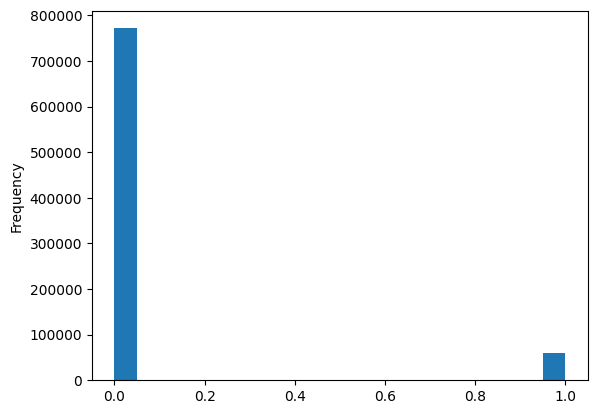

In [21]:
train['target'].plot(kind='hist',bins=20);

**Вывод:** Целевая переменна несбалансированна.

**Распределение признака vas_id**

In [22]:
train['vas_id'].nunique(), np.min(train['vas_id']), np.max(train['vas_id'])

(8, 1.0, 9.0)

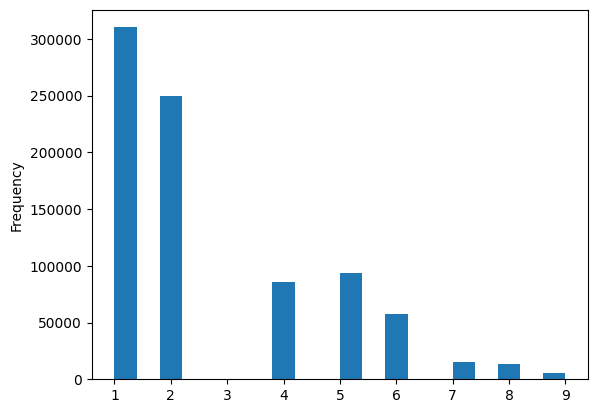

In [23]:
train['vas_id'].plot(kind='hist',bins=20);

**Вывод:** 8 услуг с номерами от 1 до 9. Услуга под цифрой 3 отсутствует.

In [24]:
test['vas_id'].nunique(), np.min(test['vas_id']), np.max(test['vas_id'])

(8, 1.0, 9.0)

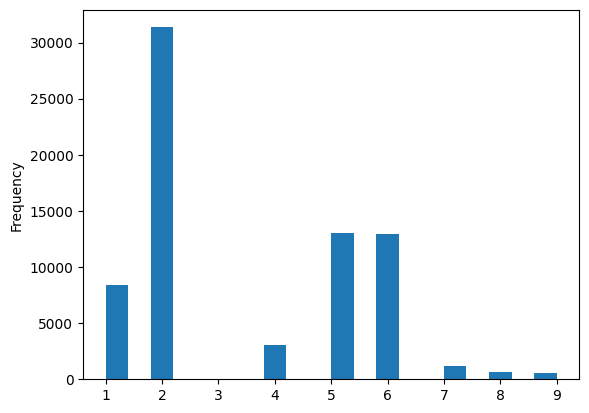

In [25]:
test['vas_id'].plot(kind='hist',bins=20);

**Вывод:** Распределение подключённых услуг на трейне и тесте различаются.

# **Диапазоны дат трейна и теста**

In [26]:
np.min(train['buy_time']), np.max(train['buy_time'])

(datetime.date(2018, 7, 8), datetime.date(2018, 12, 30))

In [27]:
np.min(test['buy_time']), np.max(test['buy_time'])

(datetime.date(2019, 1, 6), datetime.date(2019, 1, 20))

**Train:** 8 июля 2018 г - 30 декабря 2018 г.

**Test:** 6 января 2019 г - 20 января 2019 г.

**Распределение id абонентов**

In [28]:
print('Кол-во уникальных:', train['id'].nunique(), 'Мин:', np.min(train['id']), 'Макс:', np.max(train['id']))

Кол-во уникальных: 806613 Мин: 2 Макс: 4362694


In [29]:
print('Кол-во уникальных:', test['id'].nunique(), 'Мин:', np.min(test['id']), 'Макс:', np.max(test['id']))

Кол-во уникальных: 70152 Мин: 55 Макс: 4362720


In [30]:
features['id'].nunique(), np.min(features['id']), np.max(features['id'])

(225287, 10, 4362728)

**В датасете features содержатся данные по 225 тыс. 287 пользователям. Датасет features представлен ОДНОЙ СТРОКОЙ данных на ОДНОГО ПОЛЬЗОВАТЕЛЯ.**

**В train и test представлены подвыборки из 806 тыc. и 70 тыс. пользователей соответственно. Причём пользователи в выборка выборочные, не подряд.**

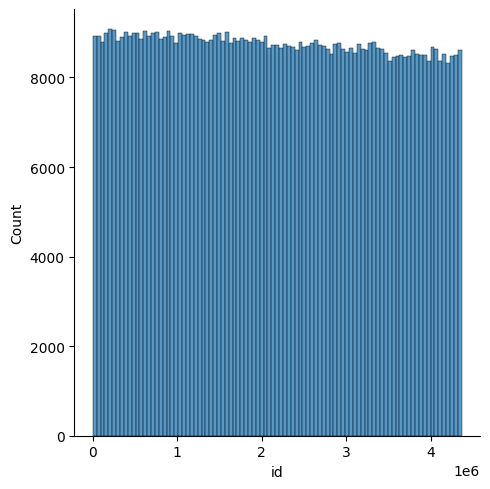

In [31]:
sns.displot(train, x='id');

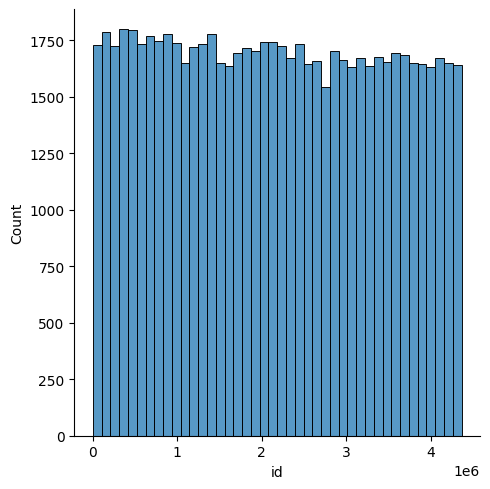

In [32]:
sns.displot(test, x='id');

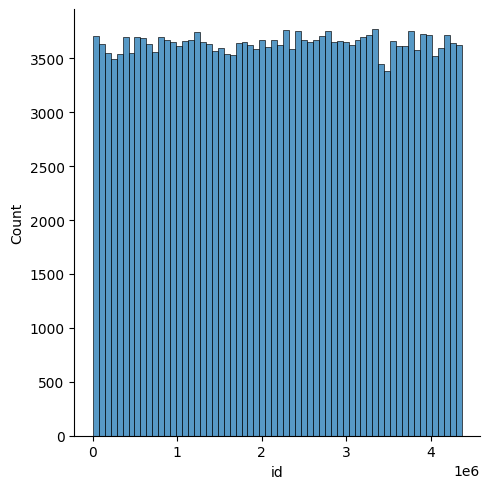

In [33]:
sns.displot(features, x='id');

**Распределение id пользователей трейна и теста скошенное. Это говорит о том, что количество новых пользователей со временем уменьшается. Но на датасете features такой закономерности не наблюдается.**

Плот корреляций строится 2 мин!

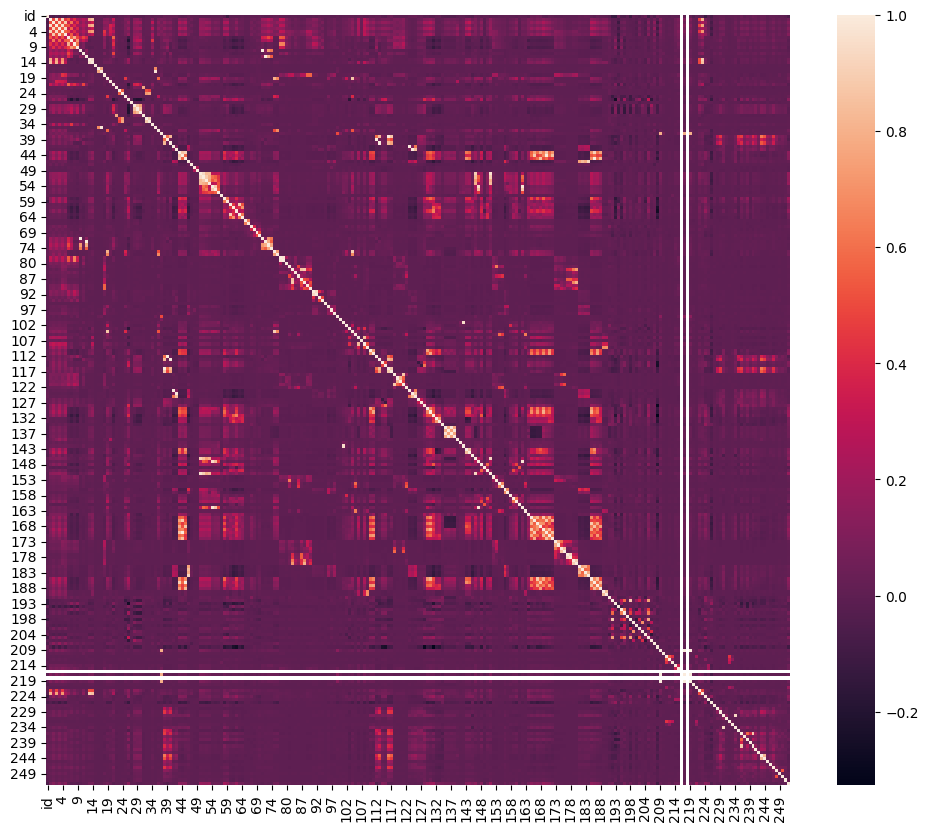

In [34]:
plt, ax = plt.subplots(figsize=(12, 10))
sns.heatmap(features.corr(),ax=ax);

# **Поиск дубликатов id**

In [35]:
train.duplicated(subset=['id']).value_counts()

False    806613
True      25040
dtype: int64

In [36]:
test.duplicated(subset=['id']).value_counts()

False    70152
True      1079
dtype: int64

In [37]:
features.duplicated(subset=['id']).value_counts()

False    225287
True        339
dtype: int64

In [38]:
ids = train["id"]
train[ids.isin(ids[ids.duplicated()])].sort_values('id')

,id,vas_id,buy_time,target
14042,342,2.0,2018-11-18,1.0
14041,342,1.0,2018-11-04,0.0
19825,492,6.0,2018-12-16,1.0
19824,492,4.0,2018-10-07,0.0
22908,579,4.0,2018-11-18,1.0
...,...,...,...,...
751154,4339012,2.0,2018-11-18,1.0
248700,4347691,4.0,2018-11-25,0.0
248701,4347691,6.0,2018-11-18,1.0
366175,4350615,2.0,2018-12-09,1.0


In [39]:
print("ID уникален? ", train['id'].is_unique)
print("Есть ли дубли в строках?", train['id'].duplicated().sum())
print("Сколько процент признаков могут принимать null-значениями? %d%%" % float((train['id'].isnull().sum() > 0).sum()/len(train['id'])*100))

ID уникален?  False
Есть ли дубли в строках? 25040
Сколько процент признаков могут принимать null-значениями? 0%


# **Сохраняем в pkl**

In [40]:
train.to_pickle(path.joinpath('train.pkl'))

In [41]:
test.to_pickle(path.joinpath('test.pkl'))

In [42]:
features.to_pickle(path.joinpath('features.pkl'))

# **Загружаем из pkl**

In [43]:
train = pd.read_pickle(path.joinpath('train.pkl'))

In [44]:
test = pd.read_pickle(path.joinpath('test.pkl'))

In [45]:
features = pd.read_pickle(path.joinpath('features.pkl'))

# **Исследование повторяющихся id**

In [46]:
features.head(3)

,id,buy_time,0,1,2,3,4,5,6,7,...,243,244,245,246,247,248,249,250,251,252
0,2013026,2018-07-15,18.910029,46.980888,4.969214,-1.386798,3.791754,-14.01179,-16.08618,-65.076097,...,-977.373846,-613.770792,-25.996269,-37.630448,-301.747724,-25.832889,-0.694428,-12.175933,-0.45614,0.0
1,2014722,2018-10-14,36.690029,152.400888,448.069214,563.833202,463.841754,568.99821,-16.08618,-53.216097,...,-891.373846,-544.770792,-20.996269,48.369552,80.252276,-13.832889,-0.694428,-1.175933,-0.45614,0.0
2,2015199,2018-12-23,-67.019971,157.050888,-63.180786,178.103202,-68.598246,156.99821,3.51382,25.183903,...,-977.373846,-613.770792,-12.996269,-37.630448,10829.252276,-25.832889,-0.694428,-12.175933,-0.45614,0.0


**Посмотрим на повторяющиеся id по разным датасетам.**

In [47]:
ids = train["id"]
train[ids.isin(ids[ids.duplicated()])].sort_values('id').head(22)

,id,vas_id,buy_time,target
14042,342,2.0,2018-11-18,1.0
14041,342,1.0,2018-11-04,0.0
19825,492,6.0,2018-12-16,1.0
19824,492,4.0,2018-10-07,0.0
22908,579,4.0,2018-11-18,1.0
22909,579,6.0,2018-12-30,0.0
23753,610,8.0,2018-08-26,0.0
23754,610,8.0,2018-11-18,1.0
26111,665,6.0,2018-11-25,1.0
26110,665,2.0,2018-12-09,0.0


In [48]:
ids = test["id"]
test[ids.isin(ids[ids.duplicated()])].sort_values('id').head(22)

,id,vas_id,buy_time
552,274,4.0,2019-01-20
551,274,2.0,2019-01-13
10677,4770,4.0,2019-01-13
10676,4770,2.0,2019-01-20
20241,8166,1.0,2019-01-06
20242,8166,6.0,2019-01-20
25062,9775,6.0,2019-01-13
25061,9775,2.0,2019-01-06
40336,15522,2.0,2019-01-06
40337,15522,6.0,2019-01-13


In [49]:
ids = features["id"]
features[ids.isin(ids[ids.duplicated()])].sort_values('id') #.iloc[17:43, 0:2]

,id,buy_time,0,1,2,3,4,5,6,7,...,243,244,245,246,247,248,249,250,251,252
91676,14368,2018-11-25,-83.159971,37.170888,-97.100786,-15.436798,-102.518246,-35.01179,-16.08618,-65.076097,...,-976.373846,-613.770792,-25.996269,-37.630448,-204.747724,-25.832889,-0.694428,-12.175933,-0.45614,0.0
1246,14368,2018-11-18,302.870029,47.940888,288.929214,-4.666798,283.511754,134.65821,-16.08618,-65.076097,...,-977.373846,-613.770792,-25.996269,-37.630448,-298.747724,-16.832889,-0.694428,-12.175933,-0.45614,0.0
204815,32736,2018-11-18,366.620029,202.760888,395.049214,192.523202,389.631754,171.41821,-16.08618,-65.076097,...,-977.373846,-613.770792,-25.996269,-37.630448,-306.747724,-25.832889,-0.694428,-12.175933,-0.45614,0.0
114322,32736,2018-08-19,352.370029,370.890888,423.169214,710.623202,417.751754,689.51821,-16.08618,-65.076097,...,-977.373846,-613.770792,-25.996269,-37.630448,-306.747724,-25.832889,-0.694428,-12.175933,-0.45614,0.0
182341,35666,2018-12-09,411.670029,115.560888,397.729214,62.953202,396.891754,46.42821,-16.08618,-65.076097,...,-283.373846,11.229208,-21.996269,90.369552,64.252276,-3.832889,-0.694428,-12.175933,-0.45614,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
136984,4342814,2018-11-11,-96.799971,-69.199112,-106.500786,-117.566798,-111.918246,-135.70179,-16.08618,-65.076097,...,-963.373846,-601.770792,-22.996269,-37.630448,56.252276,-9.832889,11.305572,-12.175933,-0.45614,1.0
190716,4343963,2019-01-06,-96.799971,242.670888,-106.570786,228.133202,-111.988246,207.02821,-16.08618,-65.076097,...,-974.373846,-613.770792,48.003731,107.369552,-169.747724,-21.832889,-0.694428,-12.175933,-0.45614,0.0
100457,4343963,2018-08-26,-79.859971,11.310888,-85.330786,-32.826798,-90.748246,-53.93179,-16.08618,-65.076097,...,-977.373846,-613.770792,-25.996269,-37.630448,-306.747724,-25.832889,-0.694428,-12.175933,-0.45614,0.0
136995,4349615,2018-11-18,455.740029,430.710888,471.459214,407.763202,466.041754,386.65821,526.28382,493.873903,...,-977.373846,-613.770792,-25.996269,-37.630448,-306.747724,-25.832889,-0.694428,-12.175933,-0.45614,1.0


In [50]:
features[features['id'] == 35666]

,id,buy_time,0,1,2,3,4,5,6,7,...,243,244,245,246,247,248,249,250,251,252
159658,35666,2018-11-11,442.180029,158.270888,428.239214,115.833202,422.821754,94.72821,-16.08618,-65.076097,...,2043.626154,2403.229208,-24.996269,-36.630448,-189.747724,-24.832889,-0.694428,-12.175933,-0.45614,1.0
182341,35666,2018-12-09,411.670029,115.560888,397.729214,62.953202,396.891754,46.42821,-16.08618,-65.076097,...,-283.373846,11.229208,-21.996269,90.369552,64.252276,-3.832889,-0.694428,-12.175933,-0.45614,1.0


In [51]:
features['id'].value_counts().sort_values(ascending=False)

4121023    2
1861064    2
1216601    2
1255984    2
3412620    2
          ..
3365692    1
3362735    1
3362784    1
3362848    1
3395617    1
Name: id, Length: 225287, dtype: int64

**Количество дубликатов не больше 2-х. Значит каждому клиенту предлагали не больше 2-х услуг. Значит можно объединить датасет сделав его в 2 раза шире.**

# **Объединение merge_asof nearest**

**Объеденим датасет так, чтобы id сопадали, а строки из датасета features брались с ближайшей датой.**

In [52]:
train = pd.merge_asof(train.sort_values(by=['id']), 
                       features.sort_values(by=['id']), 
                       on='id', 
                       by='buy_time', 
                       direction='nearest')
train

,id,vas_id,buy_time,target,0,1,2,3,4,5,...,243,244,245,246,247,248,249,250,251,252
0,2,2.0,2018-12-23,0.0,-96.799971,-408.179112,-110.740786,-460.786798,-116.158246,-481.89179,...,-977.373846,-613.770792,-25.996269,-37.630448,-306.747724,-25.832889,-0.694428,-12.175933,-0.45614,0.0
1,4,1.0,2018-08-05,0.0,-96.799971,102.410888,-101.850786,89.633202,-107.268246,68.52821,...,-962.373846,-612.770792,-25.996269,-33.630448,5.252276,-14.832889,-0.694428,-1.175933,-0.45614,0.0
2,15,1.0,2018-08-12,0.0,-96.799971,134.190888,-110.740786,81.583202,-116.158246,60.47821,...,-977.373846,-613.770792,-22.996269,-37.630448,-278.747724,-25.832889,-0.694428,-12.175933,-0.45614,0.0
3,16,2.0,2018-10-28,0.0,-94.679971,-61.139112,-104.380786,-101.036798,-109.798246,-122.14179,...,2064.626154,2427.229208,-25.996269,-37.630448,-20.747724,112.167111,-0.694428,-12.175933,-0.45614,0.0
4,29,1.0,2018-08-05,0.0,-96.799971,102.410888,-101.850786,89.633202,-107.268246,68.52821,...,-962.373846,-612.770792,-25.996269,-33.630448,5.252276,-14.832889,-0.694428,-1.175933,-0.45614,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
831648,4362634,1.0,2018-12-30,0.0,-96.799971,-103.089112,-110.740786,-86.226798,-116.158246,-107.33179,...,-221.373846,107.229208,-23.996269,57.369552,-6.747724,123.167111,-0.694428,-12.175933,-0.45614,1.0
831649,4362640,2.0,2018-12-30,0.0,-96.799971,-103.089112,-110.740786,-86.226798,-116.158246,-107.33179,...,-221.373846,107.229208,-23.996269,57.369552,-6.747724,123.167111,-0.694428,-12.175933,-0.45614,1.0
831650,4362647,6.0,2018-12-30,0.0,-96.799971,-103.089112,-110.740786,-86.226798,-116.158246,-107.33179,...,-221.373846,107.229208,-23.996269,57.369552,-6.747724,123.167111,-0.694428,-12.175933,-0.45614,1.0
831651,4362684,5.0,2018-12-23,0.0,-86.119971,-125.889112,-97.520786,-175.956798,-102.938246,-197.06179,...,-977.373846,-613.770792,-25.996269,-37.630448,-306.747724,-25.832889,-0.694428,-12.175933,-0.45614,0.0


# **Модель LAMA**

In [53]:
train_data, valid_data = train_test_split(train, 
                                          test_size=0.2, 
                                          #stratify=train['id'], 
                                          random_state=42)

logging.info('Parts sizes: tr_data = {}, valid_data = {}'
              .format(train_data.shape, valid_data.shape))

In [54]:
def f1_metric(y_true, y_pred):
    return f1_score(y_true, (y_pred > 0.5).astype(int))

task = Task('binary', metric = f1_metric)

In [55]:
automl = TabularAutoML(task = task, 
                       timeout = 600, # 600 seconds = 10 minutes
                       cpu_limit = 8, # 4 is optimal for Kaggle kernels
                       general_params = {'use_algos': [['linear_l2', 
                                         'lgb', 'lgb_tuned']]})

In [56]:
oof_pred = automl.fit_predict(train_data, roles = {'target': 'target', 'drop': 'buy_time'})

INFO:lightautoml.automl.presets.base:Stdout logging level is ERROR.
INFO:lightautoml.automl.presets.base:Task: binary

INFO:lightautoml.automl.presets.base:Start automl preset with listed constraints:
INFO:lightautoml.automl.presets.base:- time: 600.00 seconds
INFO:lightautoml.automl.presets.base:- CPU: 8 cores
INFO:lightautoml.automl.presets.base:- memory: 16 GB

INFO:lightautoml.reader.base:Train data shape: (415826, 252)

INFO3:lightautoml.reader.base:Feats was rejected during automatic roles guess: []
INFO:lightautoml.automl.base:Layer 1 train process start. Time left 532.84 secs
INFO:lightautoml.ml_algo.base:Start fitting Lvl_0_Pipe_0_Mod_0_LinearL2 ...
DEBUG:lightautoml.ml_algo.base:Training params: {'tol': 1e-06, 'max_iter': 100, 'cs': [1e-05, 5e-05, 0.0001, 0.0005, 0.001, 0.005, 0.01, 0.05, 0.1, 0.5, 1, 5, 10, 50, 100, 500, 1000, 5000, 10000, 50000, 100000], 'early_stopping': 2, 'categorical_idx': [223], 'embed_sizes': array([9], dtype=int32), 'data_size': 224}
INFO2:lightautom

In [57]:
valid_pred = automl.predict(valid_data)

In [58]:
def acc_score(y_true, y_pred):
    return accuracy_score(y_true, (y_pred > 0.5).astype(int))

print('OOF acc: {}'.format(acc_score(train_data['target'].values, oof_pred.data[:, 0])))
print('VAL acc: {}'.format(acc_score(valid_data['target'].values, valid_pred.data[:, 0])))

OOF acc: 0.9285302025366379
VAL acc: 0.9319356366950678


In [59]:
f1_score(valid_data['target'], (valid_pred.data[:, 0].astype(int)), average='macro')

0.48125438965270756

# **LAMA + stacking**

In [60]:
automl = TabularUtilizedAutoML(task = task, 
                       timeout = 600, # 600 seconds = 10 minutes
                       cpu_limit = 8, # 4 is optimal for Kaggle kernels
                       general_params = {'use_algos': [['linear_l2', 'lgb', 'cb'], ['lgb_tuned', 'cb']]})

In [61]:
oof_pred = automl.fit_predict(train_data, roles = {'target': 'target', 'drop': 'buy_time'})

INFO:lightautoml.addons.utilization.utilization:Start automl utilizator with listed constraints:
INFO:lightautoml.addons.utilization.utilization:- time: 600.00 seconds
INFO:lightautoml.addons.utilization.utilization:- CPU: 8 cores
INFO:lightautoml.addons.utilization.utilization:- memory: 16 GB

INFO:lightautoml.addons.utilization.utilization:If one preset completes earlier, next preset configuration will be started

INFO:lightautoml.addons.utilization.utilization:==================================================
INFO:lightautoml.addons.utilization.utilization:Start 0 automl preset configuration:
INFO:lightautoml.addons.utilization.utilization:conf_0_sel_type_0.yml, random state: {'reader_params': {'random_state': 42}, 'general_params': {'return_all_predictions': False}}
INFO3:lightautoml.addons.utilization.utilization:Found general_params in kwargs, need to combine
INFO3:lightautoml.addons.utilization.utilization:Merged variant for general_params = {'use_algos': [['linear_l2', 'lgb', 

In [62]:
valid_pred = automl.predict(valid_data)

In [63]:
def acc_score(y_true, y_pred):
    return accuracy_score(y_true, (y_pred > 0.5).astype(int))

print('OOF acc: {}'.format(acc_score(train_data['target'].values, oof_pred.data[:, 0])))
print('VAL acc: {}'.format(acc_score(valid_data['target'].values, valid_pred.data[:, 0])))

OOF acc: 0.9285686801691092
VAL acc: 0.9320823323160834


In [64]:
f1_score(valid_data['target'], (valid_pred.data[:, 0].astype(int)), average='macro')

0.48125438965270756

# **Объединение merge_asof backward**

In [ ]:
train = pd.merge_asof(train.sort_values(by=['id']), 
                       features.sort_values(by=['id']), 
                       on='id', 
                       by='buy_time', 
                       direction='backward')
train

# **Модель LAMA**

In [ ]:
train_data, valid_data = train_test_split(train, 
                                          test_size=0.2, 
                                          #stratify=train['id'], 
                                          random_state=42)

logging.info('Parts sizes: tr_data = {}, valid_data = {}'
              .format(train_data.shape, valid_data.shape))

In [ ]:
def f1_metric(y_true, y_pred):
    return f1_score(y_true, (y_pred > 0.5).astype(int))

task = Task('binary', metric = f1_metric)

In [ ]:
automl = TabularAutoML(task = task, 
                       timeout = 600, # 600 seconds = 10 minutes
                       cpu_limit = 8, # 4 is optimal for Kaggle kernels
                       general_params = {'use_algos': [['linear_l2', 
                                         'lgb', 'lgb_tuned']]})

In [ ]:
oof_pred = automl.fit_predict(train_data, roles = {'target': 'target', 'drop': 'buy_time'})

In [ ]:
valid_pred = automl.predict(valid_data)

In [ ]:
def acc_score(y_true, y_pred):
    return accuracy_score(y_true, (y_pred > 0.5).astype(int))

print('OOF acc: {}'.format(acc_score(train_data['target'].values, oof_pred.data[:, 0])))
print('VAL acc: {}'.format(acc_score(valid_data['target'].values, valid_pred.data[:, 0])))

# **Объединение merge_asof forward**

In [ ]:
train = pd.merge_asof(train.sort_values(by=['id']), 
                       features.sort_values(by=['id']), 
                       on='id', 
                       by='buy_time', 
                       direction='forward')
train

# **Модель LAMA**

In [ ]:
train_data, valid_data = train_test_split(train, 
                                          test_size=0.2, 
                                          #stratify=train['id'], 
                                          random_state=42)

logging.info('Parts sizes: tr_data = {}, valid_data = {}'
              .format(train_data.shape, valid_data.shape))

In [ ]:
def f1_metric(y_true, y_pred):
    return f1_score(y_true, (y_pred > 0.5).astype(int))

task = Task('binary', metric = f1_metric)

In [ ]:
automl = TabularAutoML(task = task, 
                       timeout = 600, # 600 seconds = 10 minutes
                       cpu_limit = 8, # 4 is optimal for Kaggle kernels
                       general_params = {'use_algos': [['linear_l2', 
                                         'lgb', 'lgb_tuned']]})

In [ ]:
oof_pred = automl.fit_predict(train_data, roles = {'target': 'target', 'drop': 'buy_time'})

In [ ]:
valid_pred = automl.predict(valid_data)

In [ ]:
def acc_score(y_true, y_pred):
    return accuracy_score(y_true, (y_pred > 0.5).astype(int))

print('OOF acc: {}'.format(acc_score(train_data['target'].values, oof_pred.data[:, 0])))
print('VAL acc: {}'.format(acc_score(valid_data['target'].values, valid_pred.data[:, 0])))

In [ ]:
f1_score(valid_data['target'], (valid_pred.data[:, 0].astype(int)), average='macro')

# **Дублирование 'id'**

**Нужно будет оставить дубли по id и закодировать время как число.**

In [ ]:
features['id'].duplicated().value_counts()

In [ ]:
train['id'].duplicated().value_counts()

**Вывод:** видим, что дублирующиеся id в трейне/тесте в большинестве случаев не дублируются в features и наоборот.

In [ ]:
train.head(3)

In [ ]:
features.head(3)

In [ ]:
train[train['id'] == 870]

In [ ]:
features[features['id'] == 870]

In [ ]:
ids = train["id"]
train_dub = train[ids.isin(ids[ids.duplicated()])].sort_values('id')
train_dub

In [ ]:
ids = features["id"]
features_dub = features[ids.isin(ids[ids.duplicated()])].sort_values('id')
features_dub

In [ ]:
both_df_dub = train_dub[train_dub['id'].isin(features_dub['id'])]
both_df_dub

In [ ]:
train[train['id'] == 3267]

In [ ]:
features[features['id'] == 3267]

# **XGBoost**

**hold out**

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(
     train.drop(['target', 'buy_time'], axis=1),
     train['target'], test_size=0.25, shuffle=True,random_state=42)


print("X_train.shape = {} rows, {} cols".format(*X_train.shape))
print("X_test.shape = {} rows, {} cols".format(*X_test.shape))

In [ ]:
params = {
        "objective": "binary:logistic",
        "booster" : "gbtree",
        "eval_metric": "auc",
        "seed": 42,
        'use_label_encoder': False
    }

model = xgb.XGBClassifier(**params)

model.fit(X_train, y_train.astype(int))

In [ ]:
train_pred = model.predict(X_train)
test_pred = model.predict(X_test)

In [ ]:
train_pred

In [ ]:
(train_pred > 0.5).astype(int)

In [ ]:
plt.hist(train_pred);

In [ ]:
train_score = f1_score(y_train, train_pred, average='macro')
test_score = f1_score(y_test, test_pred, average='macro')

print(f"Train-score: {round(train_score, 4)}, Test-score: {round(test_score, 4)}")

# **Cross-Validation**

In [ ]:
def make_cross_validation(X: pd.DataFrame,
                          y: pd.Series,
                          estimator: object,
                          metric: callable,
                          cv_strategy):
    """
    Кросс-валидация.

    Parameters
    ----------
    X: pd.DataFrame
        Матрица признаков.

    y: pd.Series
        Вектор целевой переменной.

    estimator: callable
        Объект модели для обучения.

    metric: callable
        Метрика для оценки качества решения.
        Ожидается, что на вход будет передана функция,
        которая принимает 2 аргумента: y_true, y_pred.

    cv_strategy: cross-validation generator
        Объект для описания стратегии кросс-валидации.
        Ожидается, что на вход будет передан объект типа
        KFold или StratifiedKFold.

    Returns
    -------
    oof_score: float
        Значение метрики качества на OOF-прогнозах.

    fold_train_scores: List[float]
        Значение метрики качества на каждом обучающем датасете кросс-валидации.

    fold_valid_scores: List[float]
        Значение метрики качества на каждом валидационном датасете кросс-валидации.

    oof_predictions: np.array
        Прогнозы на OOF.

    """
    estimators, fold_train_scores, fold_valid_scores = [], [], []
    oof_predictions = np.zeros(X.shape[0])

    for fold_number, (train_idx, valid_idx) in enumerate(cv_strategy.split(X, y)):
        x_train, x_valid = X.loc[train_idx], X.loc[valid_idx]
        y_train, y_valid = y.loc[train_idx], y.loc[valid_idx]

        estimator.fit(x_train, y_train)
        y_train_pred = estimator.predict(x_train)
        y_valid_pred = estimator.predict(x_valid)

        fold_train_scores.append(metric(y_train, y_train_pred))
        fold_valid_scores.append(metric(y_valid, y_valid_pred))
        oof_predictions[valid_idx] = y_valid_pred

        msg = (
            f"Fold: {fold_number+1}, train-observations = {len(train_idx)}, "
            f"valid-observations = {len(valid_idx)}\n"
            f"train-score = {round(fold_train_scores[fold_number], 4)}, "
            f"valid-score = {round(fold_valid_scores[fold_number], 4)}" 
        )
        print(msg)
        print("="*69)
        estimators.append(estimator)

    oof_score = metric(y, oof_predictions)
    print(f"CV-results train: {round(np.mean(fold_train_scores), 4)} +/- {round(np.std(fold_train_scores), 3)}")
    print(f"CV-results valid: {round(np.mean(fold_valid_scores), 4)} +/- {round(np.std(fold_valid_scores), 3)}")
    print(f"OOF-score = {round(oof_score, 4)}")

    return estimators, oof_score, fold_train_scores, fold_valid_scores, oof_predictions

In [ ]:
def f1_score_macro(true, pred):
    return f1_score(true, pred.astype(int), average='macro')

cv_strategy = KFold(n_splits=10)
params = {
        "objective": "binary:logistic",
        "booster" : "gbtree",
        "eval_metric": "auc",
        "seed": 42,
        'use_label_encoder': False
    }

model = xgb.XGBClassifier(**params)

estimators, oof_score, fold_train_scores, fold_valid_scores, oof_predictions = make_cross_validation(
    train.drop(['target', 'buy_time'], axis=1), 
    train['target'],
    model, 
    metric=f1_score_macro, 
    cv_strategy=cv_strategy
)

In [ ]:
def f1_score_macro_threshold(true, pred):
    return f1_score(true, np.where(pred > 0.3, 1, 0), average='macro')

cv_strategy = KFold(n_splits=10)
params = {
        "objective": "binary:logistic",
        "booster" : "gbtree",
        "eval_metric": "auc",
        "seed": 42,
        'use_label_encoder': False
    }

model = xgb.XGBClassifier(**params)

estimators, oof_score, fold_train_scores, fold_valid_scores, oof_predictions = make_cross_validation(
    train.drop(['target', 'buy_time'], axis=1), 
    train['target'],
    model, 
    metric=f1_score_macro_threshold, 
    cv_strategy=cv_strategy
)

# **Тип бустинга dart**

In [ ]:
def f1_score_macro(true, pred):
    return f1_score(true, pred.astype(int), average='macro')

cv_strategy = KFold(n_splits=10)
params = {
        "objective": "binary:logistic",
        "booster" : "dart",
        "eval_metric": "auc",
        "seed": 42,
        'use_label_encoder': False
    }

model = xgb.XGBClassifier(**params)

estimators, oof_score, fold_train_scores, fold_valid_scores, oof_predictions = make_cross_validation(
    train.drop(['target', 'buy_time'], axis=1), 
    train['target'],
    model, 
    metric=f1_score_macro, 
    cv_strategy=cv_strategy
)

Кросс-валидация на 10 фолдах занимает 6-8 мин.

# **Результаты**

# **Обучение модели на всём датасете и сохранение для прогноза**

In [ ]:
params = {
        "objective": "binary:logistic",
        "booster" : "gbtree",
        "eval_metric": "auc",
        "seed": 42,
        'use_label_encoder': False
    }

model = xgb.XGBClassifier(**params)

model.fit(train.drop(['target', 'buy_time'], axis=1),
          train['target'] #y_train.astype(int)
         )

In [ ]:
train_pred = model.predict(train[['id', 'vas_id']])
test_pred = model.predict(test.drop(['buy_time'], axis=1))

In [ ]:
def f1_score_macro(true, pred):
    return f1_score(true, pred.astype(int), average='macro')

f1_score_macro(train['target'], train_pred)

# **Сохраняем обученную модель**

In [ ]:
with open('model.pkl', 'wb') as file:
    pickle.dump(model, file)

In [ ]:
# Load from file
with open('model.pkl', 'rb') as file:
    model = pickle.load(file)
model

# **Формирование индивидуальных предсказаний абонентам**

In [ ]:
offer = pd.DataFrame(test.drop(['buy_time'], axis=1))
model.predict_proba(offer)[:,1]

In [ ]:
# создаём датафрейм с айлишниками абонентов
offer_predict = pd.DataFrame(test['id'].copy())

# проходим цилом по номерам подключаемых услуг
for i in [1, 2, 4, 5, 6, 7, 8, 9]:
    # создаём датафрейм с услугой
    offer = pd.DataFrame(test['id'].copy())
    offer['vas_id'] = i
    # предиктим вероятность подключения услуги
    offer_predict[i] = model.predict_proba(offer)[:,1]
offer_predict['max prob offer'] = offer_predict.iloc[:, 1:-1].max(axis = 1)
offer_predict['vas_id offer'] = offer_predict.iloc[:, 1:-1].idxmax(axis = 1)
offer_predict

**Посмотрим распределение услуг, рекомендуемых к подключению**

In [ ]:
plt.hist(offer_predict['vas_id offer'], log=True);

In [ ]:
offer_predict['vas_id offer'].value_counts()

**Посмотрим распределение вероятностей подключения услуг**

In [ ]:
plt.hist(offer_predict['max prob offer'], bins=50);

**Возможно стоит рекомендовать услуги только тем абонентам, у которых вероятность больше 0.5, чтобы минимизировать вероятность негативного эффекта в виде понижения лояльности тем клиентам, которые не согласятся на подключение услуги.**

Это сделать легко, нужно только отфильтровать вероятности по пороговому значению. В данном случае выгрузим все рекомендации независимо от спрогнозированной вероятности.

In [ ]:
offer_predict[['id', 'vas_id offer']].to_csv('offer.csv', index=False)